In [74]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import pandas as pd

In [75]:
foldername = 'nuclear pore'

In [76]:
import os
import re
import pandas as pd

# Specify the folder containing the text files
folder_path = 'D:/study/thesis/project/HBDM-main/ppi_results/test_results/'+foldername

# Define a regular expression pattern to extract information from filenames
filename_pattern = r'Dataset-ppi--RE-(\w+)--W-(\w+)--Epochs-(\d+)--D-(\d+)--RH-(\d+)--LR-([\d.]+)--LP-(\w+)--CUDA-(\w+).txt'

# Initialize an empty list to store data from all files
all_data = []

# Iterate through files in the folder
for filename in os.listdir(folder_path):
    # Match the filename pattern to extract information
    match = re.match(filename_pattern, filename)
    if match:
        # Extract relevant information from the filename
        re_value, w_value, epochs, d, k, _, _, _ = match.groups()

        # Read the content of the file
        file_path = os.path.join(folder_path, filename)
        with open(file_path, 'r') as file:
            file_content = file.read()

        # Use regular expressions to extract k, Precision, and Coverage from the file content
        data_matches = re.findall(r'k- (\d+) precision: ([0-9.]+) coverage: ([0-9.]+)', file_content)

        # Create a list of dictionaries for each data point
        data = [{'RE': re_value, 'W': w_value, 'Epochs': int(epochs), 'D': int(d), 'k': int(match[0]), 'Precision': float(match[1]), 'Coverage': float(match[2])} for match in data_matches]

        # Extend the all_data list with data from this file
        all_data.extend(data)

# Create a DataFrame
df = pd.DataFrame(all_data)



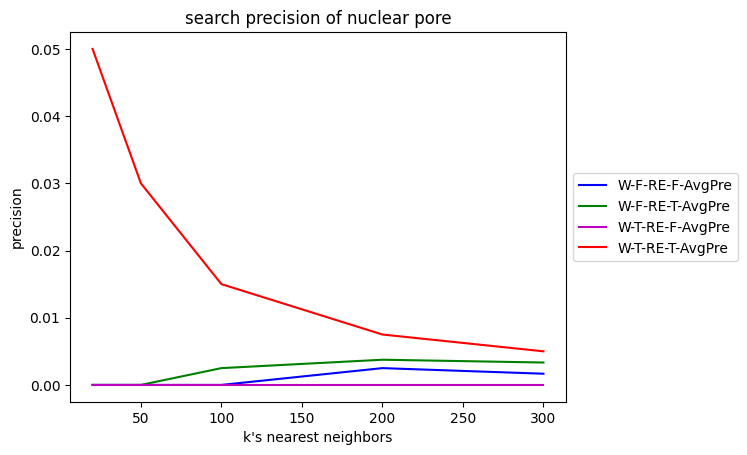

In [77]:
# Filter the DataFrame for RE-False-W-False and RE-True-W-False conditions
x = [20,50,100,200,300]

plt.plot(x,df[(df['W']=='False')&(df['RE']=='False')][['Precision']], label = "W-F-RE-F-AvgPre", color='blue') 
# plt.plot(x,df[(df['W']=='False')&(df['RE']=='False')][['Random Precision']], label = "W-F-RE-F-RanPre", linestyle="--",  color='blue') 


plt.plot(x,df[(df['W']=='False')&(df['RE']=='True')][['Precision']], label = "W-F-RE-T-AvgPre", color='green') 
# plt.plot(x,df[(df['W']=='False')&(df['RE']=='True')][['Random Precision']], label = "W-F-RE-T-RanPre", linestyle="--",  color='green') 

plt.plot(x,df[(df['W']=='True')&(df['RE']=='False')][['Precision']], label = "W-T-RE-F-AvgPre", color='m') 
# plt.plot(x,df[(df['W']=='True')&(df['RE']=='False')][['Random Precision']], label = "W-T-RE-F-RanPre", linestyle="--",  color='m') 

plt.plot(x,df[(df['W']=='True')&(df['RE']=='True')&(df['Epochs']==15000)&(df['D']==2)][['Precision']], label = "W-T-RE-T-AvgPre", color='r') 
# plt.plot(x,df[(df['W']=='True')&(df['RE']=='True')&(df['Epochs']==15000)&(df['D']==2)][['Random Precision']], label = "W-T-RE-T-RanPre", linestyle="--",  color='r') 


# Show the plots
plt.xlabel('k\'s nearest neighbors')
plt.ylabel('precision')
plt.title('search precision of ' + foldername)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

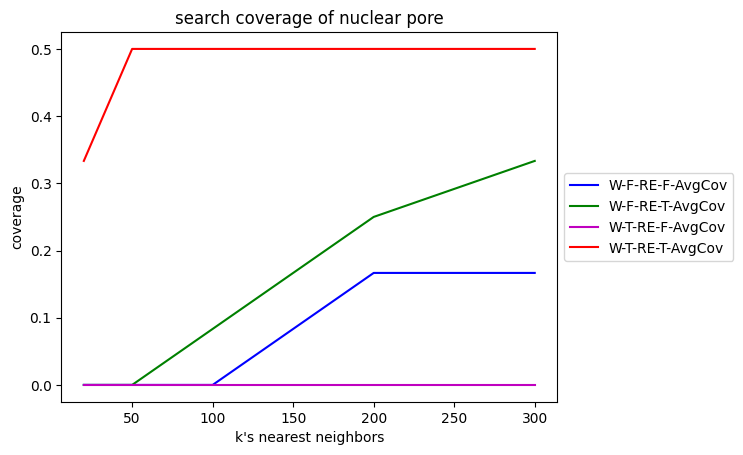

In [78]:

# Filter the DataFrame for RE-False-W-False and RE-True-W-False conditions
x = [20,50,100,200,300]

plt.plot(x,df[(df['W']=='False')&(df['RE']=='False')][['Coverage']], label = "W-F-RE-F-AvgCov", color='blue') 
# plt.plot(x,df[(df['W']=='False')&(df['RE']=='False')][['Random Coverage']], label = "W-F-RE-F-RanCov", linestyle="--",  color='blue') 


plt.plot(x,df[(df['W']=='False')&(df['RE']=='True')][['Coverage']], label = "W-F-RE-T-AvgCov", color='green') 
# plt.plot(x,df[(df['W']=='False')&(df['RE']=='True')][['Random Coverage']], label = "W-F-RE-T-RanCov", linestyle="--",  color='green') 

plt.plot(x,df[(df['W']=='True')&(df['RE']=='False')][['Coverage']], label = "W-T-RE-F-AvgCov", color='m') 
# plt.plot(x,df[(df['W']=='True')&(df['RE']=='False')][['Random Coverage']], label = "W-T-RE-F-RanCov", linestyle="--",  color='m') 

plt.plot(x,df[(df['W']=='True')&(df['RE']=='True')&(df['Epochs']==15000)&(df['D']==2)][['Coverage']], label = "W-T-RE-T-AvgCov", color='r') 
# plt.plot(x,df[(df['W']=='True')&(df['RE']=='True')&(df['Epochs']==15000)&(df['D']==2)][['Random Coverage']], label = "W-T-RE-T-RanCov", linestyle="--",  color='r') 


# Show the plots
plt.xlabel('k\'s nearest neighbors')
plt.ylabel('coverage')
plt.title('search coverage of ' + foldername)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

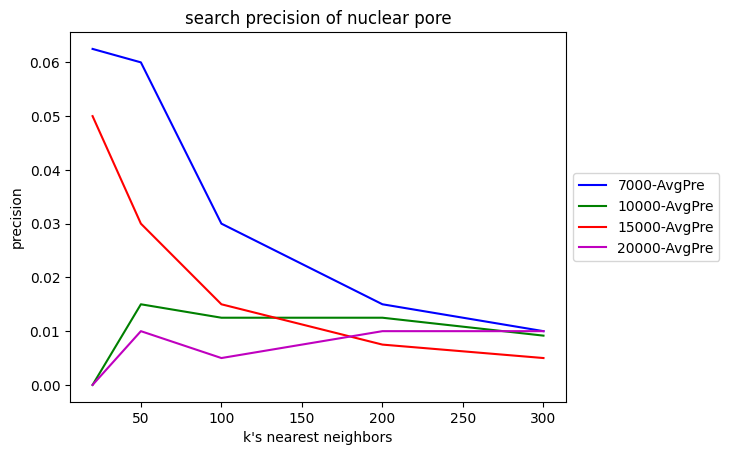

In [79]:
# Filter the DataFrame for RE-False-W-False and RE-True-W-False conditions
x = [20,50,100,200,300]

colors = ['b','g','r','m']
epoch_list = [7000,10000,15000,20000]
for i, epoch in enumerate(epoch_list):
    plt.plot(x,df[(df['W']=='True')&(df['RE']=='True')&(df['Epochs']==epoch)&(df['D']==2)][['Precision']], label = str(epoch)+"-AvgPre", color=colors[i]) 
    # plt.plot(x,df[(df['W']=='True')&(df['RE']=='True')&(df['Epochs']==epoch)&(df['D']==2)][['Random Precision']], label = str(epoch)+"-RanPre", linestyle="--",  color=colors[i]) 

# Show the plots
plt.xlabel('k\'s nearest neighbors')
plt.ylabel('precision')
plt.title('search precision of ' + foldername)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

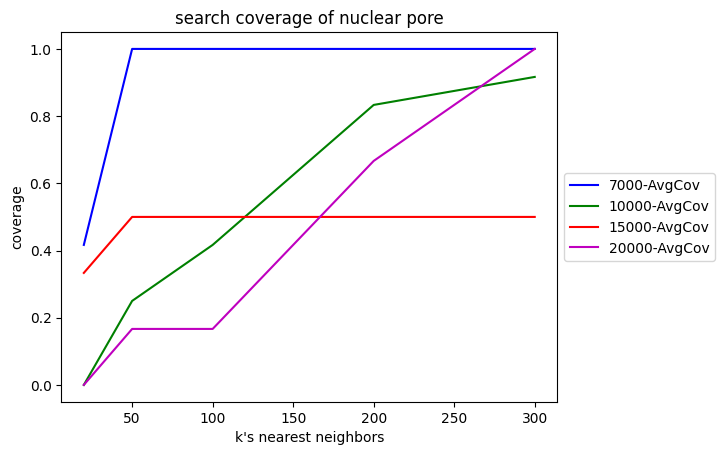

In [80]:
# Filter the DataFrame for RE-False-W-False and RE-True-W-False conditions
x = [20,50,100,200,300]

colors = ['b','g','r','m']
epoch_list = [7000,10000,15000,20000]
for i, epoch in enumerate(epoch_list):
    plt.plot(x,df[(df['W']=='True')&(df['RE']=='True')&(df['Epochs']==epoch)&(df['D']==2)][['Coverage']], label = str(epoch)+"-AvgCov", color=colors[i]) 
    # plt.plot(x,df[(df['W']=='True')&(df['RE']=='True')&(df['Epochs']==epoch)&(df['D']==2)][['Random Coverage']], label = str(epoch)+"-RanCov", linestyle="--",  color=colors[i]) 

# Show the plots
plt.xlabel('k\'s nearest neighbors')
plt.ylabel('coverage')
plt.title('search coverage of ' + foldername)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [81]:
import matplotlib.colors as mcolors


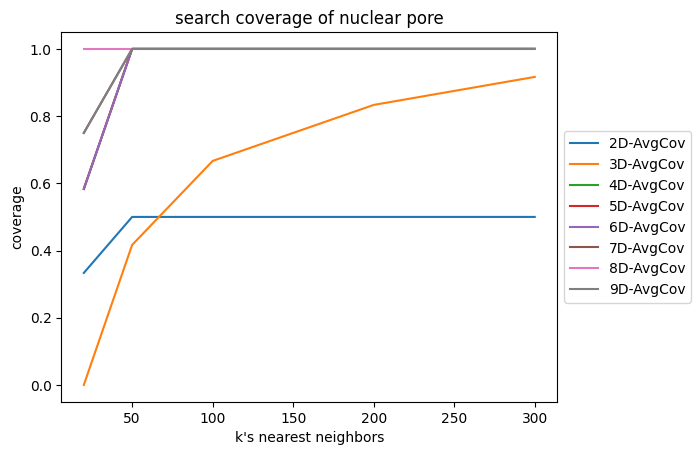

In [82]:
# Filter the DataFrame for RE-False-W-False and RE-True-W-False conditions
x = [20,50,100,200,300]

colors = list(mcolors.TABLEAU_COLORS.values())
d_list = [2,3,4,5,6,7,8,9]
for i, dim in enumerate(d_list):
    plt.plot(x,df[(df['W']=='True')&(df['RE']=='True')&(df['Epochs']==15000)&(df['D']==dim)][['Coverage']], label = str(dim)+"D-AvgCov", color=colors[i]) 
    # plt.plot(x,df[(df['W']=='True')&(df['RE']=='True')&(df['Epochs']==15000)&(df['D']==dim)][['Random Coverage']], label = str(dim)+"D-RanCov", linestyle="--",  color=colors[i]) 

# Show the plots
plt.xlabel('k\'s nearest neighbors')
plt.ylabel('coverage')
plt.title('search coverage of ' + foldername)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

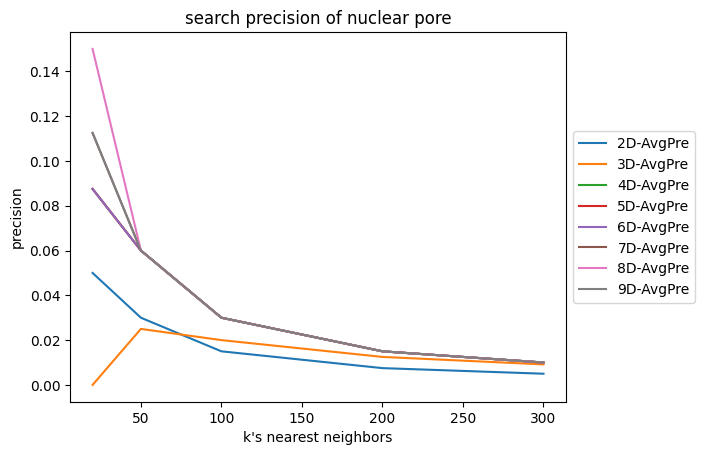

In [83]:
# Filter the DataFrame for RE-False-W-False and RE-True-W-False conditions
x = [20,50,100,200,300]

colors = list(mcolors.TABLEAU_COLORS.values())
d_list = [2,3,4,5,6,7,8,9]
for i, dim in enumerate(d_list):
    plt.plot(x,df[(df['W']=='True')&(df['RE']=='True')&(df['Epochs']==15000)&(df['D']==dim)][['Precision']], label = str(dim)+"D-AvgPre", color=colors[i]) 
    # plt.plot(x,df[(df['W']=='True')&(df['RE']=='True')&(df['Epochs']==15000)&(df['D']==dim)][['Random Precision']], label = str(dim)+"D-RanPre", linestyle="--",  color=colors[i]) 

# Show the plots
plt.xlabel('k\'s nearest neighbors')
plt.ylabel('precision')
plt.title('search precision of ' + foldername)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [84]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Generate x values
# x = np.linspace(0.01, 5, 400)  # Avoid x=0 for ln curve

# # Calculate ln and -ln values
# ln_y = np.log(x)
# neg_ln_y = -np.log(x)

# # Create a figure and axis
# plt.figure(figsize=(8, 6))
# plt.title("ln(Y) and -ln(Y) Curves")
# #plt.title("-ln(Y) Curve")

# # Plot ln curve in blue
# plt.plot(x, ln_y, label="ln(Y)", color="blue")

# # Plot -ln curve in red
# plt.plot(x, neg_ln_y, label="-ln(Y)", color="red")

# # Add labels and legend
# plt.xlabel("Y")
# plt.ylabel("")
# plt.legend()

# # Show the plot
# plt.grid()
# plt.show()


In [85]:
with open(r'D:\study\thesis\project\HBDM-main\datasets\ppi\ppi_index.pkl', 'rb') as file:
    id2index = pickle.load(file)
with open(r'D:\study\thesis\project\HBDM-main\datasets\ppi\ppi_aliases2stringId.pkl', 'rb') as file:
    aliases2stringId = pickle.load(file)
with open(r'D:\study\thesis\project\HBDM-main\datasets\ppi\ppi_name2stringId.pkl', 'rb') as file:
    name2stringId = pickle.load(file)

In [86]:
def convert_stringId(alias):
    try:
        stringId = name2stringId[alias]
    except:
        #print(alias, 'can\'t be converted by name2stringId! Now trying aliases2stringId.')
        try:
            stringId = aliases2stringId[alias]
        except:
            #print(alias, 'can\'t be converted by aliases2stringId! Now return None.')
            stringId = None
    #print(alias, stringId)
    return stringId

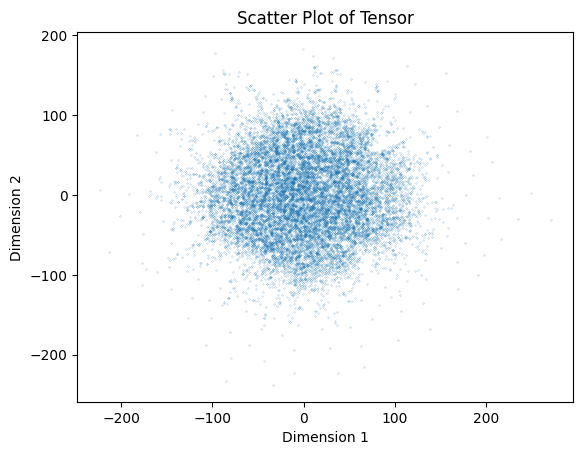

In [87]:
file_path_2d = r'D:\study\thesis\project\HBDM-main\ppi_results\w_2d_latent_representations.pkl'

# Open and load the pickle file
with open(file_path_2d, 'rb') as file:
    loaded_tensor = pickle.load(file)
# Generate some random data as a placeholder
tensor = loaded_tensor.cpu()

# Now you can convert it to a NumPy array
data = tensor.detach().numpy()


# Create a scatter plot
plt.scatter(data[:, 0], data[:, 1], s=0.02)

plt.title("Scatter Plot of Tensor")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

In [88]:
file_path_2d = '2d_latent_representations.pkl'
goi = ['DDR1','TNFA']

# Open and load the pickle file
with open(file_path_2d, 'rb') as file:
    loaded_tensor = pickle.load(file)
# Generate some random data as a placeholder
tensor = loaded_tensor.cpu()

# Now you can convert it to a NumPy array
data = tensor.detach().numpy()

# highlight dots
highlight_indices = []
for gene in goi:
    stringid = convert_stringId(gene)
    if stringid is not None:
        highlight_indices.append(id2index[int(stringid.split('.')[-1][-11:])])
    else:
        highlight_indices.append(None)

# Create a scatter plot
plt.scatter(data[:, 0], data[:, 1])

for index in highlight_indices:
    plt.scatter(data[index, 0], data[index, 1], color='red', marker='o', label=f'Data {index}')
plt.title("Scatter Plot of Tensor")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '2d_latent_representations.pkl'

In [ ]:
file_path = 'latent_representations.pkl'

# Open and load the pickle file
with open(file_path, 'rb') as file:
    loaded_tensor = pickle.load(file)

# Generate some random data as a placeholder
tensor = loaded_tensor.cpu()

# Now you can convert it to a NumPy array
data = tensor.detach().numpy()

In [ ]:
datat = data.T
datat.shape

(2, 20111)

IndexError: index 2 is out of bounds for axis 0 with size 2

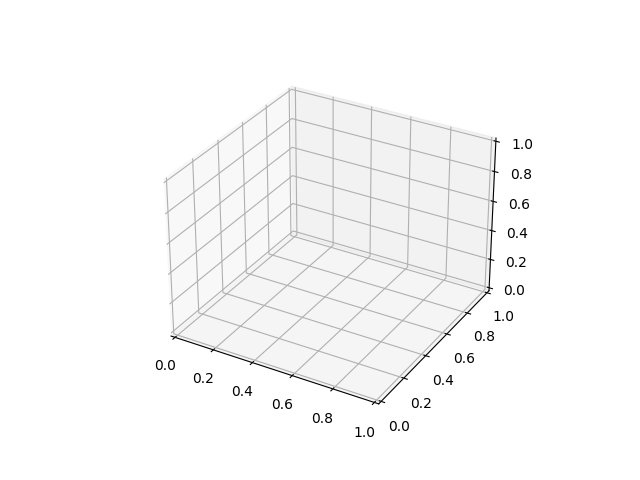

In [ ]:
%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
# creating figure
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# creating the plot
plot_geeks = ax.scatter(datat[0], datat[1], datat[2], color='green')

# setting title and labels
ax.set_title("3D plot")
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')

# displaying the plot
plt.show()